<a href="https://colab.research.google.com/github/Rinu653/Data-Science/blob/main/MLR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression 

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables.

 Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. We can define it as:

 Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

Import the Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Read the input data set

In [4]:
df=pd.read_csv('/content/Advertising.csv',sep=',')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Exploratory Data Analysis

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.size

800

In [11]:
df.shape

(200, 4)

In [12]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Extracting dependent and independent Variables:

In [13]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

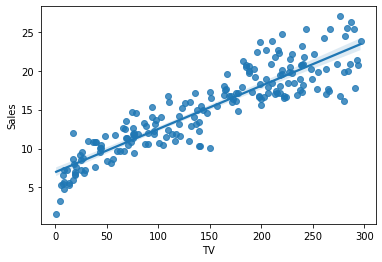

In [15]:
#  TV vs Sales
import seaborn as sns
sns.regplot(x=df['TV'],y=y)

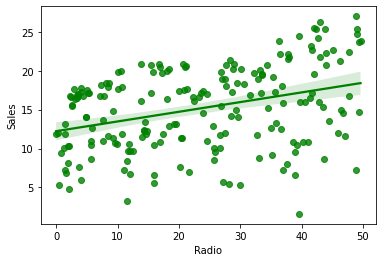

In [16]:
#  Radio vs Sales
sns.regplot(x=df['Radio'],y=y,color='green')

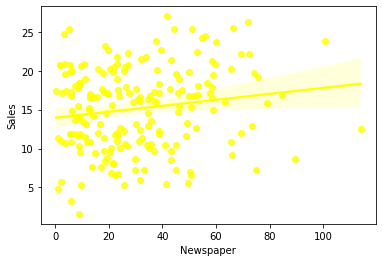

In [17]:
#  Newspaper vs Sales
sns.regplot(x=df['Newspaper'],y=y,color='yellow')

Now we will split the dataset into training and test set.

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
y_test

58     23.8
40     16.6
34     11.9
102    19.8
184    17.6
198    25.5
95     16.9
4      17.9
29     10.5
168    17.1
171    17.5
18     11.3
11     17.4
89     16.7
110    18.4
118    15.9
159    12.9
35     17.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    19.9
38     10.1
28     18.9
193    19.6
27     20.9
47     23.2
165    16.9
194    17.3
177    16.7
176    20.2
97     20.5
174    16.5
73     11.0
69     22.3
172     7.6
108     5.3
107    12.0
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    17.6
181    17.2
106     7.2
199    18.4
138     9.6
Name: Sales, dtype: float64

In [19]:
x_test

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [20]:
y_train

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: Sales, Length: 140, dtype: float64

In [21]:
x_train

,TV,Radio,Newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


Fitting our MLR model to the Training set:

In [22]:
#regression model creation
# Multiple  linear regression 

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

Prediction of Test set results:

In [23]:
y_pred=reg.predict(x_test)
y_pred

array([21.28816103, 18.04213212, 10.0595901 , 21.08224067, 20.76476044,
       24.47187353, 16.80643646, 15.62885738, 10.12479884, 18.84601896,
       15.78389695, 10.54297035, 18.92928707, 15.52557996, 17.8412711 ,
       15.24120343, 13.74212833, 21.0643733 , 10.05392699, 19.26500889,
       11.16451173, 11.97211832,  8.61179009, 11.98972141, 12.59914023,
       16.8447954 ,  9.7170889 , 21.09489946, 18.13942474, 19.55008709,
       22.08796224, 17.78527998, 16.53883452, 14.77303861, 21.39458945,
       16.95491635, 17.22755002, 12.31866943, 21.04982199,  7.77473926,
        5.38467516,  9.63139004,  6.89549204, 19.19507436,  7.88125192,
       15.18766673, 13.70978421, 21.0232936 , 20.5350058 , 20.48867548,
       24.86087902, 14.96304281,  7.33545571, 19.35630325, 21.32554066,
       14.7719757 , 17.19642519,  7.11988693, 18.30096543,  9.65158222])

In [24]:
# find m -slop or coefficient

print("slop is or coefficient",reg.coef_)

# find  c -constant

print("constant",reg.intercept_)

slop is or coefficient [ 0.05502392  0.10251003 -0.00150711]
constant 4.661439720130817


In [25]:
# to view seperate coefficient of tv, radio, newspaper
list(zip(x,reg.coef_))  

[('TV', 0.05502391767315305),
 ('Radio', 0.10251002697521279),
 ('Newspaper', -0.0015071052925105383)]

Create a data fram using y_test and y_pred

In [33]:
df1=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred})

In [32]:
df1.head()

,Actual value,predicted value
58,23.8,21.288161
40,16.6,18.042132
34,11.9,10.059590
102,19.8,21.082241
184,17.6,20.764760


Text(0, 0.5, 'salary')

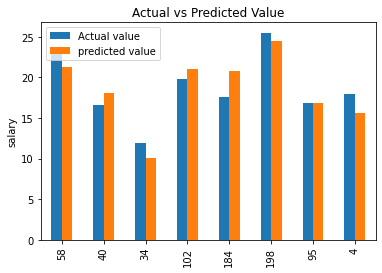

In [27]:
graph =df1.head(8)
graph.plot(kind='bar')
plt.title('Actual vs Predicted Value')
plt.ylabel('salary')

Performance evaluvation

In [31]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("percentage",mean_absolute_percentage_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("r2 square",r2_score(y_test,y_pred))

MAE 1.194741713405674
percentage 0.0769508078872673
mean_squared_error 2.370659971225658
r2 square 0.9071151423684273
